# Predicting Rain in Australia 🌧

Dataset Link: https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package

## Problematic 🤔

<font color ='red'>**Rainfall**</font> is an important factor in many fields such as **agriculture**, **transportation**, and **construction**. Accurately predicting rainfall can help these industries to plan their activities and mitigate risks associated with weather-related events. However, predicting rainfall can be a challenging task due to the complex and dynamic nature of the Earth's atmosphere. In this project, I will create a logistic regression model to predict whether it will rain or not based on various weather parameters.

## Project Goals 🥅

The main goal of this project is to develop a <font color='blue'>**logistic regression**</font> model that can predict whether it will rain or not based on various weather parameters. 

## Problem type

This project can be classified as a <font color ='green'>**binary classification**</font> problem, where The goal is to predict whether it will rain or not based on various weather parameters. Since the target variable has only two possible outcomes (rain or no rain), this is a **binary classification problem**. The <font color='blue'>**logistic regression**</font> model is a popular algorithm used for binary classification problems, and it can be used to develop an efficient model to predict whether it will rain or not based on the available weather data.



## Importing the required librairies

In [372]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

## Loading the Dataset

In [249]:
data = pd.read_csv('weatherAUS.csv')

In [250]:
data.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

## Exploratory data analysis (EDA) 🔬

In [251]:
# How many columns and rows? 
print('The dataset contains', data.shape[0],'and ', data.shape[1], 'columns')

The dataset contains 145460 and  23 columns


In [252]:
# Output a summury for the Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

The above output show us the number of columns and rows and the type of each column, I have also noticed that for some columns there is some null. In this projet the target variable is the column <font color='red'>**RainTomorrow**</font>, we cannot accept null values in this column therefore i will remove the rows that has null values in RainTomorrow, we can also notice that the column <font color ='green'>**RainToday**</font> can be highly correlated with the target variable therefore i will remove null values rows in the column RainToday. 

In [253]:
# Removing all rows that have null values in the columns 'RainToday' and  'RainTomorrow'
data = data.dropna(subset=['RainToday', 'RainTomorrow'])

In [254]:
#Checking for null values
data.isnull().sum()

Date                 0
Location             0
MinTemp            468
MaxTemp            307
Rainfall             0
Evaporation      59694
Sunshine         66805
WindGustDir       9163
WindGustSpeed     9105
WindDir9am        9660
WindDir3pm        3670
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am            656
Temp3pm           2624
RainToday            0
RainTomorrow         0
dtype: int64

### Data Visualisation


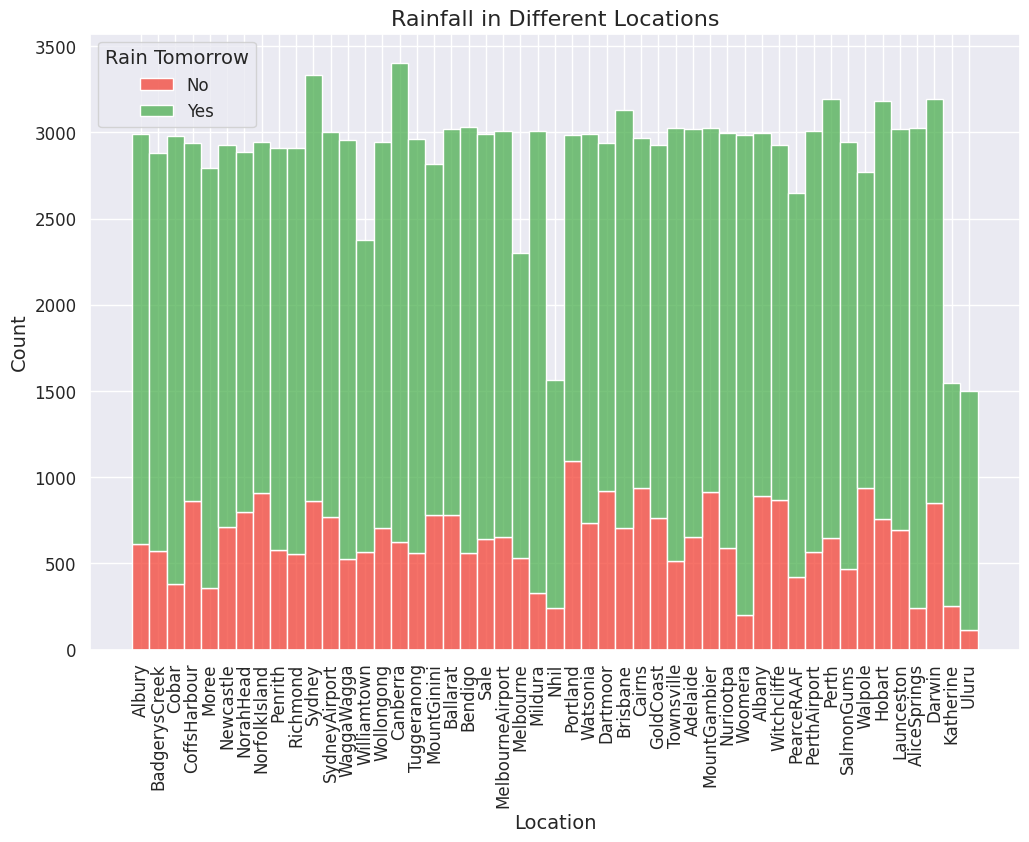

In [255]:
# Create the histogram
sns.set(style='darkgrid')
plt.figure(figsize=(12, 8))
sns.histplot(data=data, x='Location', hue='RainTomorrow', multiple='stack', palette=['#4CAF50', '#F44336'])
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Location', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Rainfall in Different Locations', fontsize=16)
plt.legend(title='Rain Tomorrow', fontsize=12, title_fontsize=14, labels=['No', 'Yes'])
plt.show()


In [256]:
import plotly.express as px

# create the figure
fig = px.histogram(data, x='Location', color='RainTomorrow', barmode='stack', 
                   title='Rainfall in Different Locations', 
                   labels={'Location': 'Location', 'RainTomorrow': 'Rain Tomorrow', 'count': 'Count'},
                   color_discrete_map={'No': '#4CAF50', 'Yes': '#F44336'})

# update the layout
fig.update_layout(
    xaxis={'title': 'Location', 'tickangle': 90},
    yaxis={'title': 'Count'},
    legend={'title': 'Rain Tomorrow'},
    font={'size': 14}
)

# show the figure
fig.show()


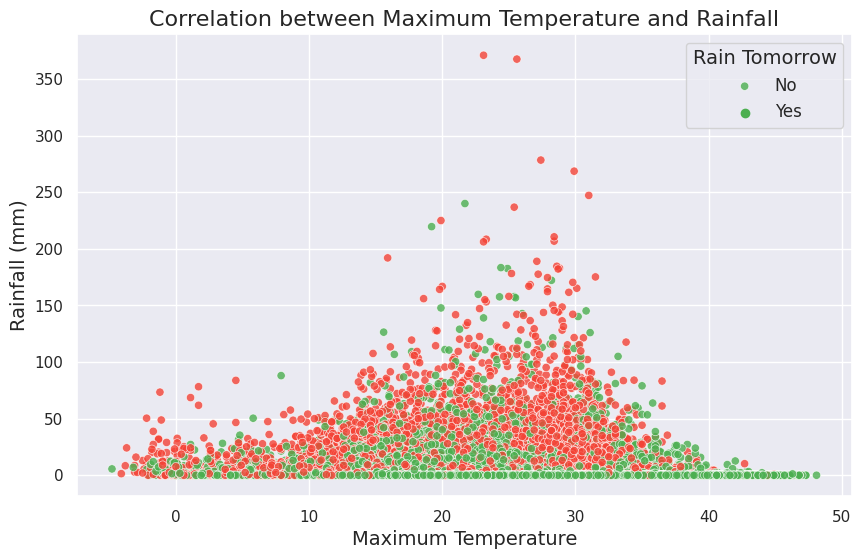

In [257]:
sns.set(style='darkgrid')

plt.figure(figsize=(10,6))

sns.scatterplot(x='MaxTemp', y='Rainfall', data=data, hue='RainTomorrow', palette=['#4CAF50', '#F44336'], alpha=0.8)

plt.xlabel('Maximum Temperature', fontsize=14)
plt.ylabel('Rainfall (mm)', fontsize=14)
plt.title('Correlation between Maximum Temperature and Rainfall', fontsize=16)
plt.legend(title='Rain Tomorrow', fontsize=12, title_fontsize=14, labels=['No', 'Yes'])

plt.show()


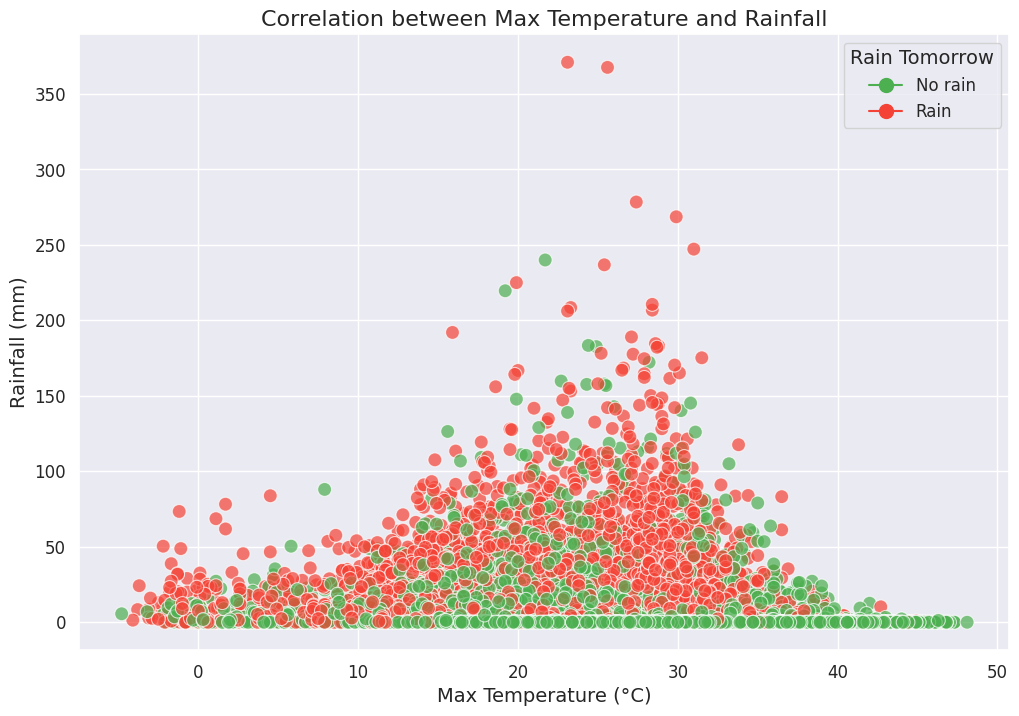

In [258]:
from matplotlib.lines import Line2D

# Create the scatter plot
sns.set(style='darkgrid')
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='MaxTemp', y='Rainfall', hue='RainTomorrow', palette=['#4CAF50', '#F44336'], alpha=0.7, s=100)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Max Temperature (°C)', fontsize=14)
plt.ylabel('Rainfall (mm)', fontsize=14)
plt.title('Correlation between Max Temperature and Rainfall', fontsize=16)

# Customize the legend
legend_labels = {'No': {'label': 'No rain', 'color': '#4CAF50', 'marker': 'o'},
                 'Yes': {'label': 'Rain', 'color': '#F44336', 'marker': 'o'}}
handles = []
for key in legend_labels:
    handles.append(Line2D([0], [0], marker=legend_labels[key]['marker'], color=legend_labels[key]['color'], label=legend_labels[key]['label'], markersize=10))
plt.legend(title='Rain Tomorrow', fontsize=12, title_fontsize=14, handles=handles)

plt.show()


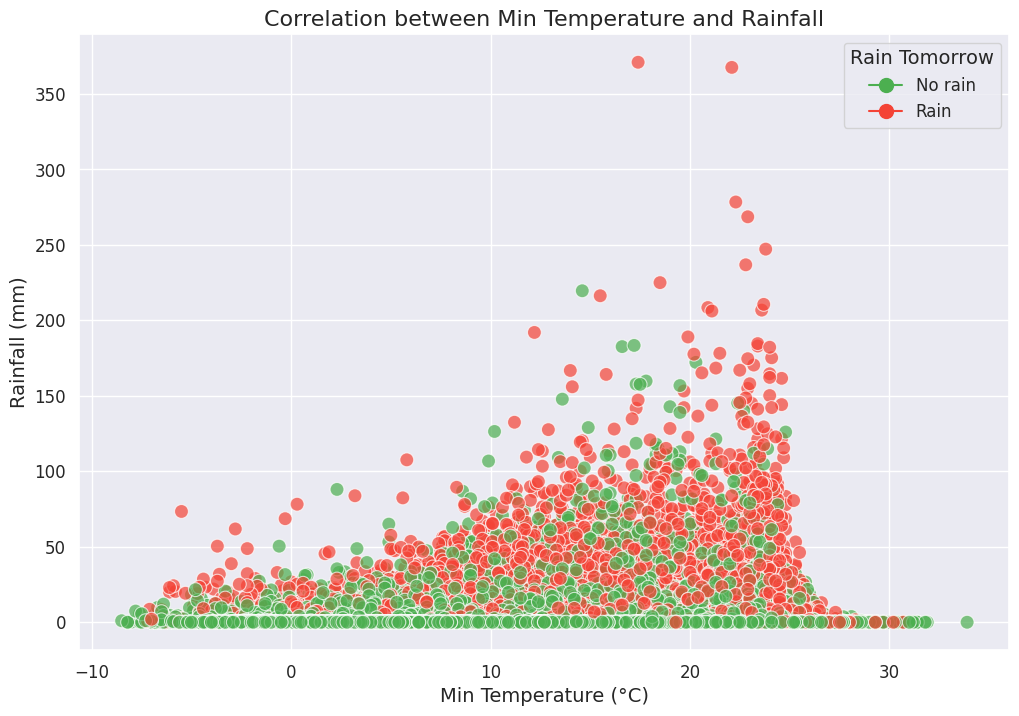

In [259]:
# Create the scatter plot
sns.set(style='darkgrid')
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='MinTemp', y='Rainfall', hue='RainTomorrow', palette=['#4CAF50', '#F44336'], alpha=0.7, s=100)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Min Temperature (°C)', fontsize=14)
plt.ylabel('Rainfall (mm)', fontsize=14)
plt.title('Correlation between Min Temperature and Rainfall', fontsize=16)

# Customize the legend
legend_labels = {'No': {'label': 'No rain', 'color': '#4CAF50', 'marker': 'o'},
                 'Yes': {'label': 'Rain', 'color': '#F44336', 'marker': 'o'}}
handles = []
for key in legend_labels:
    handles.append(Line2D([0], [0], marker=legend_labels[key]['marker'], color=legend_labels[key]['color'], label=legend_labels[key]['label'], markersize=10))
plt.legend(title='Rain Tomorrow', fontsize=12, title_fontsize=14, handles=handles)

plt.show()

In [260]:
px.scatter(data, x='MinTemp', y='MaxTemp', color='RainToday', title='Max temp VS Min Temp')

### Checking Class balance for the target column **RainTomorrow**

In [261]:
print(data['RainTomorrow'].value_counts())


No     109586
Yes     31201
Name: RainTomorrow, dtype: int64


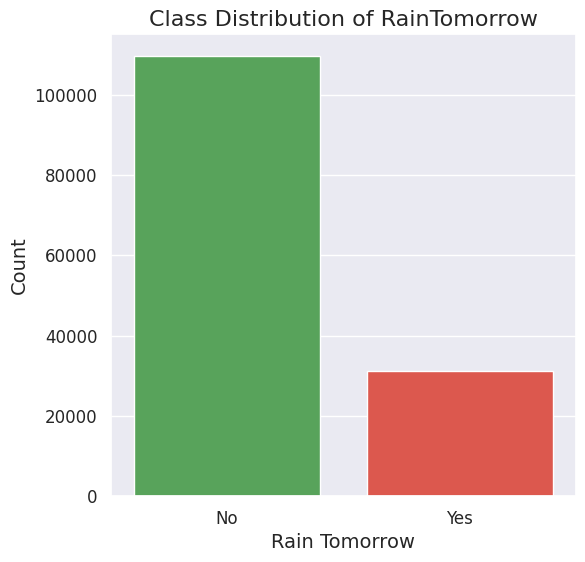

In [262]:
# Get the counts for each class
class_counts = data['RainTomorrow'].value_counts()

# Create a bar plot
sns.set(style='darkgrid')
plt.figure(figsize=(6, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette=['#4CAF50', '#F44336'])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Rain Tomorrow', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Class Distribution of RainTomorrow', fontsize=16)

plt.show()

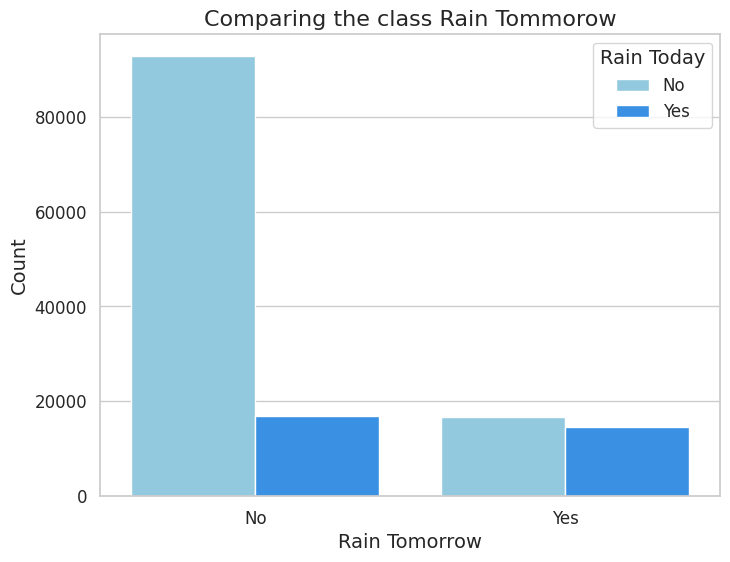

In [263]:

sns.set_style('whitegrid')
plt.figure(figsize=(8, 6))

# Create stacked bar chart
sns.countplot(data=data, x='RainTomorrow', hue='RainToday', palette=['#87CEEB', '#1E90FF'])

# Customize plot
plt.title('Comparing the class Rain Tommorow', fontsize=16)
plt.xlabel('Rain Tomorrow', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Rain Today', fontsize=12, title_fontsize=14, labels=['No', 'Yes'], loc='upper right')

plt.show()

In [264]:
px.histogram(data, x='RainTomorrow', color='RainToday', title='Class comparison')

### Data Sampling 

In [265]:
use_sample = False

In [266]:
sample_fraction = 0.1

In [267]:
if use_sample:
  data = data.sample(frac=sample_fraction).copy()

## Train, Test and validation set 

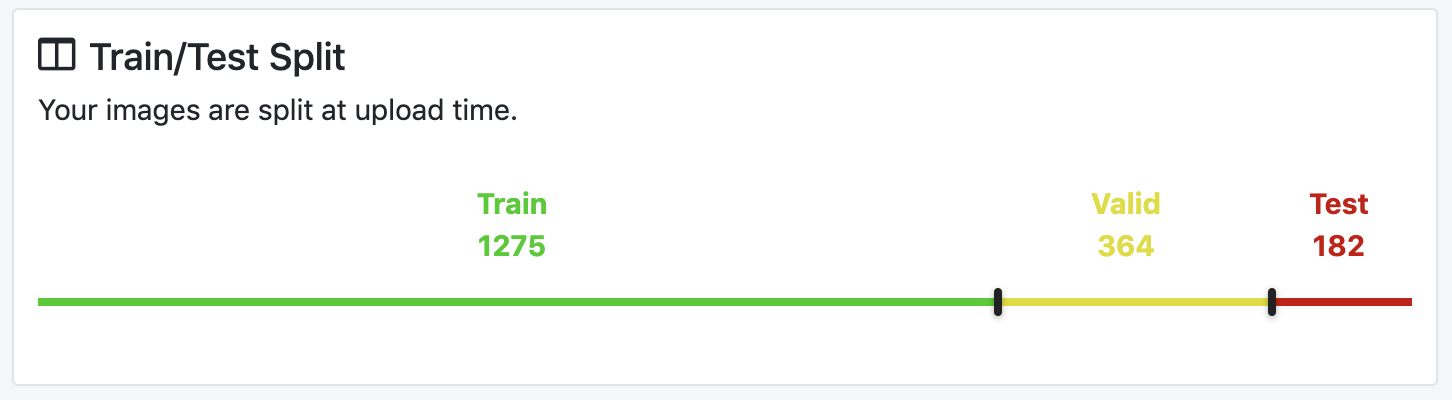

In [268]:
train_val_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_val_data, test_size=0.25, random_state=42)

In [269]:
train_data.shape

(84471, 23)

In [270]:
val_data.shape

(28158, 23)

In [271]:
test_data.shape

(28158, 23)

<Axes: title={'center': 'Date frequency'}, xlabel='Date', ylabel='count'>

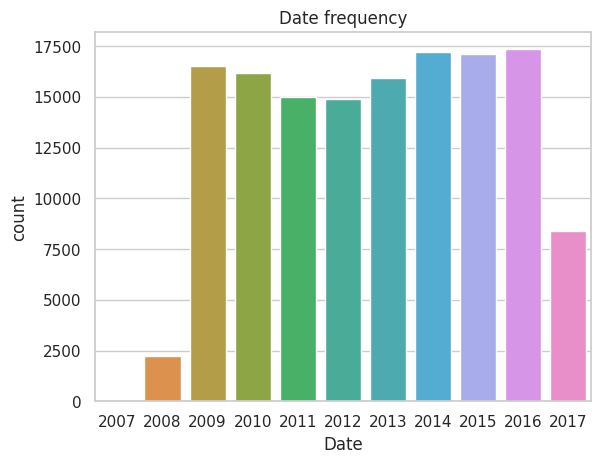

In [272]:
plt.title("Date frequency")
sns.countplot(x=pd.to_datetime(data.Date).dt.year)

In [273]:
year = pd.to_datetime(data.Date).dt.year

In [274]:
year


0         2008
1         2008
2         2008
3         2008
4         2008
          ... 
145454    2017
145455    2017
145456    2017
145457    2017
145458    2017
Name: Date, Length: 140787, dtype: int64

In [275]:
train_data = data[year < 2015]
val_data = data[year == 2015]
test_data = data[year > 2015]

## Feature Selection 


In [276]:
# Selecting all the input without the first column Date
input = list(train_data.columns)[1: -1]
target = 'RainTomorrow'

In [277]:
train_input = train_data[input].copy()
train_target = train_data[target].copy()

In [278]:
train_input.head(2)

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0   Albury     13.4     22.9       0.6          NaN       NaN           W   
1   Albury      7.4     25.1       0.0          NaN       NaN         WNW   

   WindGustSpeed WindDir9am WindDir3pm  ...  WindSpeed3pm  Humidity9am  \
0           44.0          W        WNW  ...          24.0         71.0   
1           44.0        NNW        WSW  ...          22.0         44.0   

   Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0         22.0       1007.7       1007.1       8.0       NaN     16.9   
1         25.0       1010.6       1007.8       NaN       NaN     17.2   

   Temp3pm  RainToday  
0     21.8         No  
1     24.3         No  

[2 rows x 21 columns]

In [279]:
val_input = val_data[input].copy()
val_target = val_data[target].copy()

In [280]:
test_input = test_data[input].copy()
test_target = test_data[target].copy()

In [281]:
train_target.head(2)

0    No
1    No
Name: RainTomorrow, dtype: object

In [282]:
num_col = train_input.select_dtypes(include=np.number).columns.tolist()
cat_col = train_input.select_dtypes('object').columns.tolist()

In [283]:
cat_col

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

#### Descriptive Statistics

In [284]:
train_input[num_col].describe()

MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  97674.000000  97801.000000  97988.000000  61657.000000  57942.000000   
mean      12.007831     23.022202      2.372935      5.289991      7.609004   
std        6.347175      6.984397      8.518819      3.952010      3.788813   
min       -8.500000     -4.100000      0.000000      0.000000      0.000000   
25%        7.500000     17.900000      0.000000      2.600000      4.800000   
50%       11.800000     22.400000      0.000000      4.600000      8.500000   
75%       16.600000     27.900000      0.800000      7.200000     10.600000   
max       33.900000     48.100000    371.000000     82.400000     14.300000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   91160.000000  97114.000000  96919.000000  96936.000000  96872.000000   
mean       40.215873     14.092263     18.764608     68.628745     51.469547   
std        13.697967      8.984203      8.872398     19.003097     20.756113   
min         6.000000      0.000000      0.000000      0.000000      0.000000   
25%        31.000000      7.000000     13.000000     57.000000     37.000000   
50%        39.000000     13.000000     19.000000     70.000000     52.000000   
75%        48.000000     19.000000     24.000000     83.000000     66.000000   
max       135.000000     87.000000     87.000000    100.000000    100.000000   

        Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  \
count  88876.000000  88857.000000  63000.000000  61966.000000  97414.000000   
mean    1017.513734   1015.132352      4.302952      4.410677     16.835126   
std        7.072510      6.997072      2.866634      2.693370      6.404586   
min      980.500000    979.000000      0.000000      0.000000     -5.900000   
25%     1012.800000   1010.400000      1.000000      2.000000     12.200000   
50%     1017.500000   1015.100000      5.000000      5.000000     16.600000   
75%     1022.300000   1019.900000      7.000000      7.000000     21.400000   
max     1041.000000   1039.600000      9.000000      9.000000     40.200000   

            Temp3pm  
count  97392.000000  
mean      21.540138  
std        6.831612  
min       -5.100000  
25%       16.600000  
50%       20.900000  
75%       26.200000  
max       46.100000

## Data Imputation 

Handling missing values

In [285]:
imputer = SimpleImputer(strategy='mean')

In [286]:
#checking the sum of null values for numerical values
data[num_col].isnull().sum()

MinTemp            468
MaxTemp            307
Rainfall             0
Evaporation      59694
Sunshine         66805
WindGustSpeed     9105
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am            656
Temp3pm           2624
dtype: int64

In [287]:
imputer.fit(data[num_col])

SimpleImputer()

In [288]:
list(imputer.statistics_)

[12.18482386562048,
 23.235120301822324,
 2.349974074310839,
 5.472515506887154,
 7.630539861047281,
 39.97051988882308,
 13.990496092519967,
 18.631140782316862,
 68.82683277087672,
 51.44928834695453,
 1017.6545771543717,
 1015.2579625879797,
 4.431160817585808,
 4.499250233195188,
 16.98706638787991,
 21.69318269001107]

In [289]:
train_input[num_col].head(3)

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0     13.4     22.9       0.6          NaN       NaN           44.0   
1      7.4     25.1       0.0          NaN       NaN           44.0   
2     12.9     25.7       0.0          NaN       NaN           46.0   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0          20.0          24.0         71.0         22.0       1007.7   
1           4.0          22.0         44.0         25.0       1010.6   
2          19.0          26.0         38.0         30.0       1007.6   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  
0       1007.1       8.0       NaN     16.9     21.8  
1       1007.8       NaN       NaN     17.2     24.3  
2       1008.7       NaN       2.0     21.0     23.2

In [290]:
imputer.transform(train_input[num_col])

array([[13.4       , 22.9       ,  0.6       , ...,  4.49925023,
        16.9       , 21.8       ],
       [ 7.4       , 25.1       ,  0.        , ...,  4.49925023,
        17.2       , 24.3       ],
       [12.9       , 25.7       ,  0.        , ...,  2.        ,
        21.        , 23.2       ],
       ...,
       [17.3       , 37.8       ,  0.        , ...,  4.49925023,
        29.7       , 35.7       ],
       [20.1       , 38.5       ,  0.        , ...,  4.49925023,
        29.8       , 37.2       ],
       [22.5       , 39.6       ,  0.        , ...,  4.49925023,
        30.1       , 37.4       ]])

In [291]:
train_input[num_col] = imputer.transform(train_input[num_col])
val_input[num_col] = imputer.transform(val_input[num_col]) 
test_input[num_col] = imputer.transform(test_input[num_col])

In [292]:
train_input[num_col].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [293]:
train_input[num_col].head(3)

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0     13.4     22.9       0.6     5.472516   7.63054           44.0   
1      7.4     25.1       0.0     5.472516   7.63054           44.0   
2     12.9     25.7       0.0     5.472516   7.63054           46.0   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0          20.0          24.0         71.0         22.0       1007.7   
1           4.0          22.0         44.0         25.0       1010.6   
2          19.0          26.0         38.0         30.0       1007.6   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  
0       1007.1  8.000000   4.49925     16.9     21.8  
1       1007.8  4.431161   4.49925     17.2     24.3  
2       1008.7  4.431161   2.00000     21.0     23.2

## Scaling the data

In [294]:
scaler = MinMaxScaler()

In [295]:
scaler.fit(data[num_col])

MinMaxScaler()

In [296]:
list(scaler.data_min_)

[-8.5,
 -4.8,
 0.0,
 0.0,
 0.0,
 6.0,
 0.0,
 0.0,
 0.0,
 0.0,
 980.5,
 977.1,
 0.0,
 0.0,
 -7.2,
 -5.4]

In [297]:
list(scaler.data_max_)

[33.9,
 48.1,
 371.0,
 145.0,
 14.5,
 135.0,
 130.0,
 87.0,
 100.0,
 100.0,
 1041.0,
 1039.6,
 9.0,
 9.0,
 40.2,
 46.7]

In [298]:
train_input[num_col] = scaler.transform(train_input[num_col])

In [299]:
train_input[num_col].describe()

MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  97988.000000  97988.000000  97988.000000  97988.000000  97988.000000   
mean       0.483689      0.525947      0.006396      0.036949      0.525366   
std        0.149458      0.131904      0.022962      0.021628      0.200931   
min        0.000000      0.013233      0.000000      0.000000      0.000000   
25%        0.377358      0.429112      0.000000      0.026207      0.517241   
50%        0.478774      0.514178      0.000000      0.037741      0.526244   
75%        0.591981      0.618147      0.002156      0.038621      0.634483   
max        1.000000      1.000000      1.000000      0.568276      0.986207   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   97988.000000  97988.000000  97988.000000  97988.000000  97988.000000   
mean        0.265107      0.108395      0.215668      0.686309      0.514693   
std         0.102420      0.068800      0.101424      0.189008      0.206376   
min         0.000000      0.000000      0.000000      0.000000      0.000000   
25%         0.193798      0.053846      0.149425      0.570000      0.370000   
50%         0.255814      0.100000      0.218391      0.690000      0.520000   
75%         0.310078      0.146154      0.275862      0.830000      0.650000   
max         1.000000      0.669231      1.000000      1.000000      1.000000   

        Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  \
count  97988.000000  97988.000000  97988.000000  97988.000000  97988.000000   
mean       0.612014      0.608705      0.483192      0.493693      0.507089   
std        0.111335      0.106611      0.255486      0.238028      0.134722   
min        0.000000      0.030400      0.000000      0.000000      0.027426   
25%        0.543802      0.540800      0.333333      0.333333      0.409283   
50%        0.614125      0.610527      0.492351      0.499917      0.502110   
75%        0.682645      0.675200      0.666667      0.666667      0.601266   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

            Temp3pm  
count  97988.000000  
mean       0.517103  
std        0.130726  
min        0.005758  
25%        0.422265  
50%        0.506718  
75%        0.604607  
max        0.988484

In [300]:
val_input[num_col] = scaler.transform(val_input[num_col])
test_input[num_col] = scaler.transform(test_input[num_col])

## Encoding Categorical Data 

In [301]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [302]:
encoder.fit(data[cat_col])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

In [303]:
encoder.categories_

[array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
        'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
        'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
        'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
        'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
        'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
        'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
        'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
        'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
        'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
       dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 ar

In [304]:
data[cat_col].head(3)

Location WindGustDir WindDir9am WindDir3pm RainToday
0   Albury           W          W        WNW        No
1   Albury         WNW        NNW        WSW        No
2   Albury         WSW          W        WSW        No

In [305]:
encoded_col = list(encoder.get_feature_names_out(cat_col))

In [306]:
print(encoded_col)

['Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_SalmonGums', 'Location_Sydney', 'Location_SydneyAirport', 'Location_Townsville', 'Location_Tuggeranong', 'Location_Uluru', 'Location_WaggaWagga', 'Location_Walpole', 'Location_Watsonia', 'Location_Williamtown', 'Loca

In [307]:
train_input[encoded_col] = encoder.transform(train_input[cat_col])
val_input[encoded_col] = encoder.transform(val_input[cat_col])
test_input[encoded_col] = encoder.transform(test_input[cat_col])

<ipython-input-307-95eee6524d59>:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-307-95eee6524d59>:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-307-95eee6524d59>:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-307-95eee6524d59>:1: PerformanceWarning:

In [308]:
val_input.head()

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
2133   Albury  0.469340  0.724008       0.0     0.037741  0.526244   
2134   Albury  0.566038  0.839319       0.0     0.037741  0.526244   
2135   Albury  0.603774  0.814745       0.0     0.037741  0.526244   
2136   Albury  0.813679  0.716446       0.0     0.037741  0.526244   
2137   Albury  0.648585  0.756144       0.0     0.037741  0.526244   

     WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  WindDir3pm_SE  \
2133         WSW       0.186047        ESE          W  ...            0.0   
2134          NE       0.387597        ESE        ESE  ...            0.0   
2135         NNE       0.325581         NE          N  ...            0.0   
2136         NNE       0.271318        ESE          W  ...            0.0   
2137           E       0.209302        SSE         SE  ...            1.0   

      WindDir3pm_SSE  WindDir3pm_SSW  WindDir3pm_SW  WindDir3pm_W  \
2133             0.0             0.0            0.0           1.0   
2134             0.0             0.0            0.0           0.0   
2135             0.0             0.0            0.0           0.0   
2136             0.0             0.0            0.0           1.0   
2137             0.0             0.0            0.0           0.0   

      WindDir3pm_WNW  WindDir3pm_WSW  WindDir3pm_nan  RainToday_No  \
2133             0.0             0.0             0.0           1.0   
2134             0.0             0.0             0.0           1.0   
2135             0.0             0.0             0.0           1.0   
2136             0.0             0.0             0.0           1.0   
2137             0.0             0.0             0.0           1.0   

      RainToday_Yes  
2133            0.0  
2134            0.0  
2135            0.0  
2136            0.0  
2137            0.0  

[5 rows x 123 columns]

In [309]:
print('train_inputs:', train_input.shape)
print('train_targets:', train_target.shape)
print('val_inputs:', val_input.shape)
print('val_targets:', val_target.shape)
print('test_inputs:', test_input.shape)
print('test_targets:', test_target.shape)

train_inputs: (97988, 123)
train_targets: (97988,)
val_inputs: (17089, 123)
val_targets: (17089,)
test_inputs: (25710, 123)
test_targets: (25710,)


## Save the processed data as parquet files

In [310]:
train_input.to_parquet('train_input.parquet')
val_input.to_parquet('val_input.parquet')
test_input.to_parquet('test_input.parquet')


In [311]:
pd.DataFrame(train_target).to_parquet('train_target.parquet')
pd.DataFrame(val_target).to_parquet('val_target.parquet')
pd.DataFrame(test_target).to_parquet('test_target.parquet')

## Creating the Logistic Regression Model 

In [314]:
model = LogisticRegression(solver = 'liblinear')

In [315]:
%%time
model.fit(train_input[num_col + encoded_col], train_target)

CPU times: user 2.77 s, sys: 304 ms, total: 3.07 s
Wall time: 4.49 s


LogisticRegression(solver='liblinear')

In [316]:
print(num_col + encoded_col)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_

In [325]:
print(model.coef_.tolist())

[[0.8986324151652026, -2.8799288484272725, 3.1627783941533836, 0.854233199097419, -1.6713967645743446, 6.764401997617562, -0.9423193916231418, -1.4284332004350349, 0.32288705993860534, 5.995309618290915, 5.463842155596162, -9.17680276828724, -0.16230118601099724, 1.2876575875289866, 0.4747071394851873, 2.021436091461751, 0.6016503155225178, -0.5524816082098337, 0.4781437731763531, 0.007665268046942364, 0.34681451580237477, -0.35227817340007966, 0.179711399916397, 0.44048778217353635, -0.01398114695470229, 0.02894542200290951, 0.25814954936639495, -0.02120462546599252, -0.042796507118596186, -0.4831421250609206, -0.13756199126704258, -0.5760603459151452, -0.7875267102260608, -0.2554043193119793, -0.32888557652985945, -0.5690061685416732, 0.08183012548576335, 0.01337885424500912, 0.06412739003123773, -0.902055123317936, -0.44432923536376756, 0.008522707040877443, -0.46061421444037337, -0.46551869427571413, -0.06950053405236756, 0.19116044505301996, 0.45047653558120854, 0.6081202596542495

In [326]:
print(model.intercept_)

[-2.44956109]


In [330]:
w_df = pd.DataFrame( {
    'features': (num_col + encoded_col),
    'weights': model.coef_.tolist()[0]
})

In [331]:
w_df.head()

features   weights
0      MinTemp  0.898632
1      MaxTemp -2.879929
2     Rainfall  3.162778
3  Evaporation  0.854233
4     Sunshine -1.671397

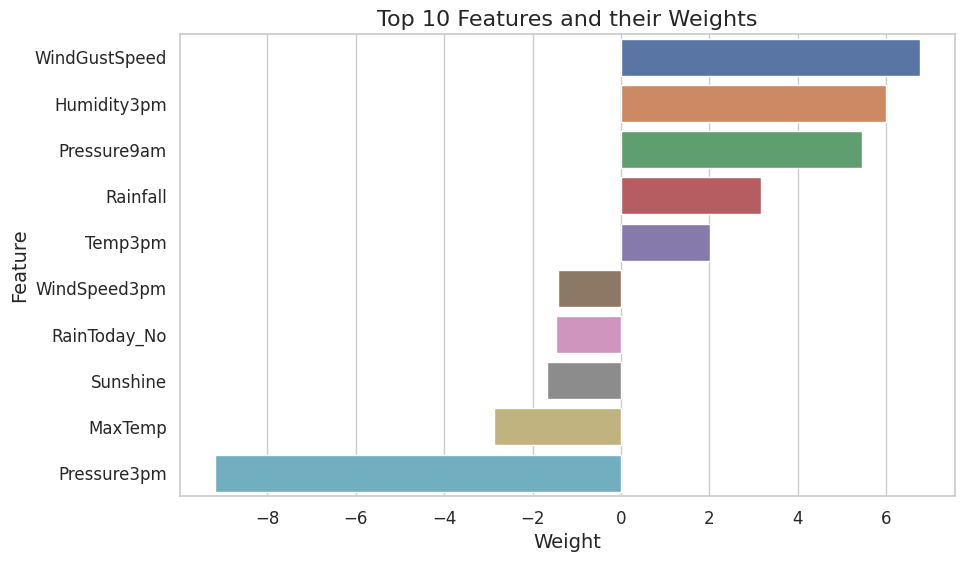

In [337]:
# Get top n features
n = 10
top_features = w_df.iloc[(-abs(w_df['weights'])).argsort()[:n]]

# Sort by weights
top_features = top_features.sort_values(by='weights', ascending=False)

# Create plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_features, x='weights', y='features')
plt.title('Top {} Features and their Weights'.format(n), fontsize=16)
plt.xlabel('Weight', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


## Model Evaluation in Train, val and test

In [338]:
X_train = train_input[num_col + encoded_col]
X_val = val_input[num_col + encoded_col]
X_test = test_input[num_col + encoded_col]

In [339]:
train_pred = model.predict(X_train)

In [340]:
train_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [341]:
train_target

0         No
1         No
2         No
3         No
4         No
          ..
144548    No
144549    No
144550    No
144551    No
144552    No
Name: RainTomorrow, Length: 97988, dtype: object

In [343]:
accuracy_score(train_target, train_pred)

0.8519206433440829

In [344]:
train_prob = model.predict_proba(X_train)

In [345]:
train_prob

array([[0.94401311, 0.05598689],
       [0.94074304, 0.05925696],
       [0.96093735, 0.03906265],
       ...,
       [0.98749147, 0.01250853],
       [0.98334725, 0.01665275],
       [0.87453712, 0.12546288]])

In [347]:
confusion_matrix(train_target, train_pred, normalize='true')

array([[0.94621341, 0.05378659],
       [0.4776585 , 0.5223415 ]])

In [349]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds

Accuracy: 85.19%


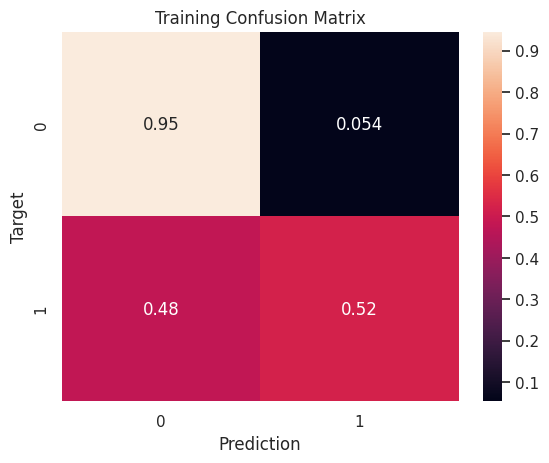

In [350]:
train_preds = predict_and_plot(X_train, train_target, 'Training')


Accuracy: 85.40%


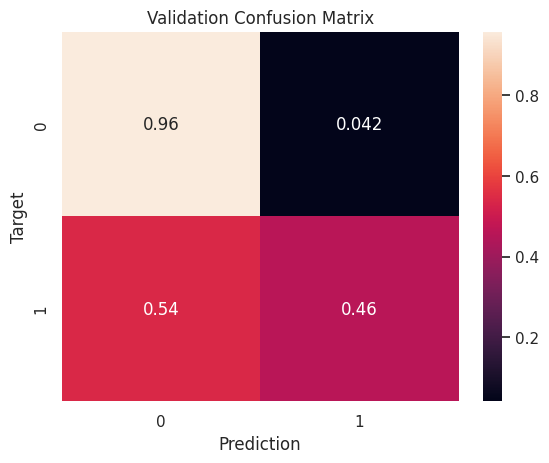

In [351]:
val_preds = predict_and_plot(X_val, val_target, 'Validation')


Accuracy: 84.20%


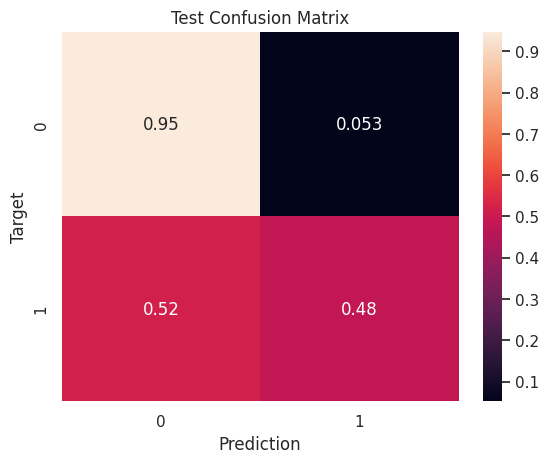

In [352]:
test_preds = predict_and_plot(X_test, test_target, 'Test')


## Testing the Model on new data

In [364]:
new_input = {'Date': '2023-05-04',
             'Location': 'Katherine',
             'MinTemp': 2.2,
             'MaxTemp': 13.2,
             'Rainfall': 10.2,
             'Evaporation': 14.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 80.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 45.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'No'}

In [365]:
new_data = pd.DataFrame([new_input])

In [366]:
new_data

Date   Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2023-05-04  Katherine      2.2     13.2      10.2         14.2       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... WindSpeed3pm  Humidity9am  \
0         NNW           80.0         NW  ...         45.0         89.0   

   Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0         58.0       1004.8       1001.5       8.0       5.0     25.7   

   Temp3pm  RainToday  
0     33.0         No  

[1 rows x 22 columns]

In [367]:
new_data[num_col] = imputer.transform(new_data[num_col])
new_data[num_col] = scaler.transform(new_data[num_col])
new_data[encoded_col] = encoder.transform(new_data[cat_col])

<ipython-input-367-0a5971089081>:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-367-0a5971089081>:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-367-0a5971089081>:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-367-0a5971089081>:3: PerformanceWarning:

In [368]:
new_data

Date   Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2023-05-04  Katherine  0.252358  0.340265  0.027493     0.097931  0.526244   

  WindGustDir  WindGustSpeed WindDir9am  ... WindDir3pm_SE  WindDir3pm_SSE  \
0         NNW       0.573643         NW  ...           0.0             0.0   

   WindDir3pm_SSW  WindDir3pm_SW  WindDir3pm_W  WindDir3pm_WNW  \
0             0.0            0.0           0.0             0.0   

   WindDir3pm_WSW  WindDir3pm_nan  RainToday_No  RainToday_Yes  
0             0.0             0.0           1.0            0.0  

[1 rows x 124 columns]

In [369]:
X_new_input = new_data[num_col + encoded_col]
X_new_input

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0  0.252358  0.340265  0.027493     0.097931  0.526244       0.573643   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  WindDir3pm_SE  \
0           0.1      0.517241         0.89         0.58  ...            0.0   

   WindDir3pm_SSE  WindDir3pm_SSW  WindDir3pm_SW  WindDir3pm_W  \
0             0.0             0.0            0.0           0.0   

   WindDir3pm_WNW  WindDir3pm_WSW  WindDir3pm_nan  RainToday_No  RainToday_Yes  
0             0.0             0.0             0.0           1.0            0.0  

[1 rows x 118 columns]

In [370]:
model.predict(X_new_input)[0]

'Yes'

In [371]:
model.predict_proba(X_new_input)[0]

array([0.2077012, 0.7922988])

# Saving the model, encoder and scaler 

In [375]:
aus_rain = {
    'model': model,
    'imputer': imputer,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input,
    'target_col': target,
    'numeric_cols': num_col,
    'categorical_cols': cat_col,
    'encoded_cols': encoded_col
}

In [376]:
joblib.dump(aus_rain, 'aus_rain.joblib')

['aus_rain.joblib']

In [377]:
## Loading the model 
the_rain = joblib.load('aus_rain.joblib')

In [380]:
the_rain['model'].intercept_

array([-2.44956109])

In [381]:
the_rain['model'].coef_

array([[ 8.98632415e-01, -2.87992885e+00,  3.16277839e+00,
         8.54233199e-01, -1.67139676e+00,  6.76440200e+00,
        -9.42319392e-01, -1.42843320e+00,  3.22887060e-01,
         5.99530962e+00,  5.46384216e+00, -9.17680277e+00,
        -1.62301186e-01,  1.28765759e+00,  4.74707139e-01,
         2.02143609e+00,  6.01650316e-01, -5.52481608e-01,
         4.78143773e-01,  7.66526805e-03,  3.46814516e-01,
        -3.52278173e-01,  1.79711400e-01,  4.40487782e-01,
        -1.39811470e-02,  2.89454220e-02,  2.58149549e-01,
        -2.12046255e-02, -4.27965071e-02, -4.83142125e-01,
        -1.37561991e-01, -5.76060346e-01, -7.87526710e-01,
        -2.55404319e-01, -3.28885577e-01, -5.69006169e-01,
         8.18301255e-02,  1.33788542e-02,  6.41273900e-02,
        -9.02055123e-01, -4.44329235e-01,  8.52270704e-03,
        -4.60614214e-01, -4.65518694e-01, -6.95005341e-02,
         1.91160445e-01,  4.50476536e-01,  6.08120260e-01,
         4.27312767e-01, -2.83317484e-02,  2.51547821e-0

In [383]:
the_rain['model'].predict(X_new_input)

array(['Yes'], dtype=object)